# Visualisation de données avec Python

*Data Visualization With Python*

* Damien Garaud / [@jazzydag](https://twitter.com/jazzydag)
* https://github.com/garaud
* 2018-03 **Meetup Python Bordeaux**

## Plan

* Les types de données
* Le choix des couleurs et le cerveau
* Exemples
* Autres bibliothèques

Quelques imports Python avant de commencer

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import samples_generator
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import seaborn as sns
import altair as alt

In [3]:
matplotlib.rcParams['figure.figsize'] = [10.0, 6.0]
matplotlib.rcParams['xtick.major.size'] = 8.0

## Type de Données 

* Catégories

* Continues

* Ordinales

### Catégories

* villes
* sexe
* type de fleur
* type de magasin
* marques de téléphone
* sociétés

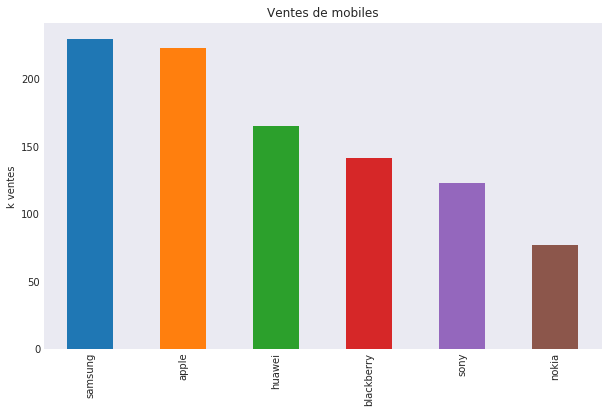

In [4]:
# Catégories
mobile = pd.Series({"sony": 123, "samsung": 230, "apple": 223,
                    "huawei": 165, "blackberry": 142, "nokia": 77})
with sns.axes_style("dark") as axe:
    mobile.sort_values(ascending=False).plot.bar(title="Ventes de mobiles", ax=axe)
    plt.ylabel("k ventes")

### Continues

* Valeurs physiques (température)
* Prix des maisons
* Probabilité d'occupation de stations de vélo

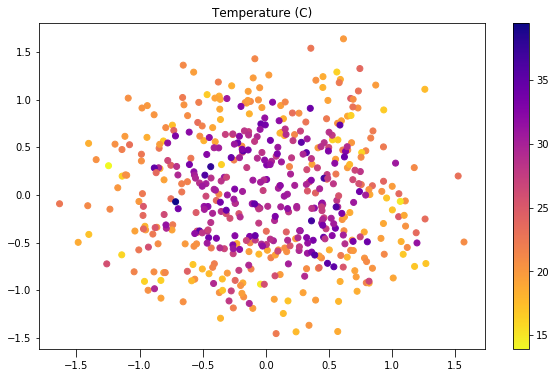

In [5]:
circles, label = samples_generator.make_circles(500, noise=0.25, factor=0.5, shuffle=False)
# two circles of temperature (C)
inner = 30 + np.random.randn(250) * 3
outer = 20 + np.random.randn(250) * 2
values = list(outer) + list(inner)
plt.scatter(circles[:, 0], circles[:, 1], c=values, cmap='plasma_r')
plt.title("Temperature (C)")
_ = plt.colorbar()

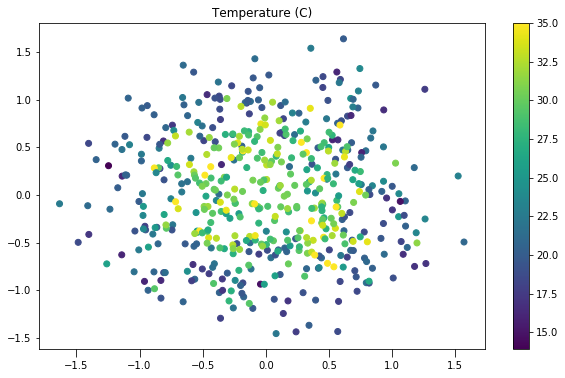

In [6]:
plt.scatter(circles[:, 0], circles[:, 1], c=values, cmap='viridis', vmax=35)
plt.title("Temperature (C)")
_ = plt.colorbar()

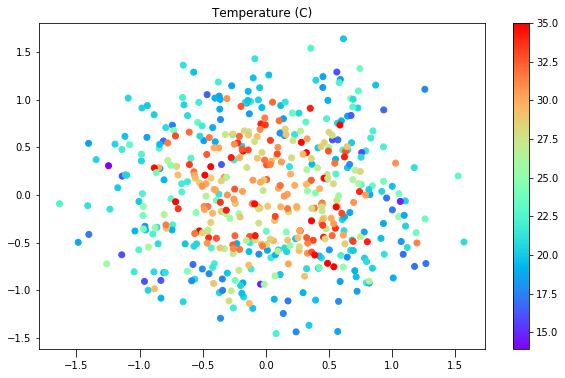

In [8]:
plt.scatter(circles[:, 0], circles[:, 1], c=values, cmap='rainbow', vmax=35)
plt.title("Temperature (C)")
_ = plt.colorbar()

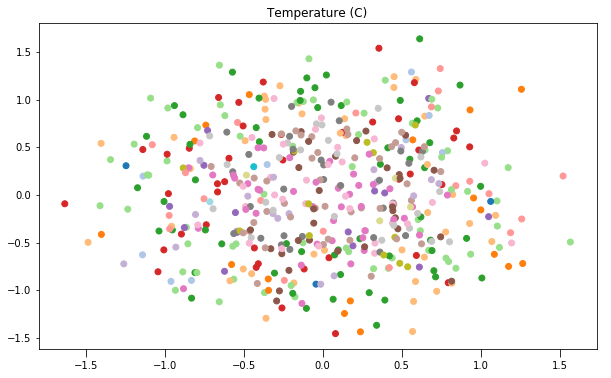

In [7]:
plt.scatter(circles[:, 0], circles[:, 1], c=values, cmap='tab20')
_ = plt.title("Temperature (C)")

### Ordinal
**notion d'ordre**

* Des notes en classe : A, B, C, D...
* Des classes d'âge
* Des tailles de vêtements : XS, S, M, L, XL

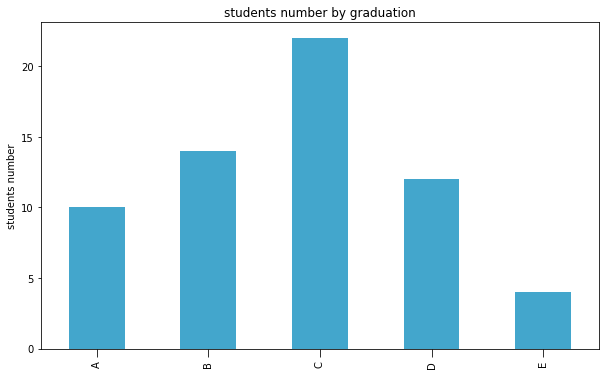

In [9]:
notes = pd.Series({"A": 10, "B": 14, "C": 22, "D": 12, "E": 4})
notes.plot.bar(title="students number by graduation", color="#43a6cc")
_ = plt.ylabel("students number")

On veut peut-être mettre une couleur par note.

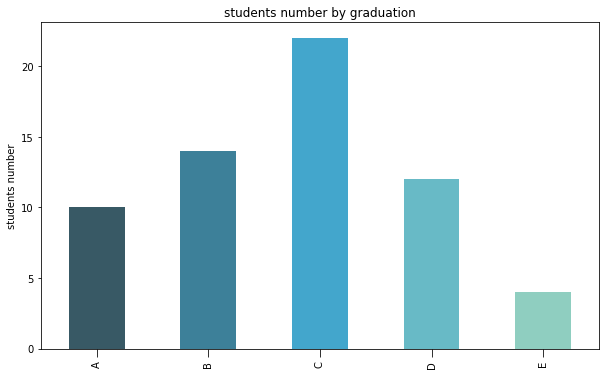

In [10]:
color = sns.color_palette("GnBu_d", notes.shape[0])
notes.plot.bar(title='students number by graduation', color=color)
_ = plt.ylabel("students number")

## Le choix des couleurs et le cerveau

Quelle palette de couleurs pour quel type de données ?

aka *colormaps* ou *color palette*

Perception & interprétation des couleurs par le cerveau

### Trois types de palettes

  - Sequential
  - Qualitative
  - Diverging

#### Sequential

* Valeurs continues
* Données ordinales

#### Qualitative

=> données de type *Catégories*

* Marque de téléphone
* Type de fleur
...

#### Diverging

* Souvent des valeurs continues
* Valeurs bornées
* Valeurs seuils, e.g. 0 pour des valeurs [-1, 1]
* Notion de symétrie

#### Remarques

* faire attention au rendu de niveau de gris (impression noir & blanc)
* faire attention au distinction de couleurs pour les daltoniens (*colorblindness*)

### seaborn et ses palettes

http://seaborn.pydata.org/

Des *widgets* seaborn dans le notebook pour choisir et construire ses palettes.

In [11]:
sns.choose_colorbrewer_palette('sequential')

A Jupyter Widget

[(0.95755478662053051, 0.95755478662053051, 0.95755478662053051),
 (0.90120722798923492, 0.90120722798923492, 0.90120722798923492),
 (0.83289504036908879, 0.83289504036908879, 0.83289504036908879),
 (0.75021914648212229, 0.75021914648212229, 0.75021914648212229),
 (0.64341407151095731, 0.64341407151095731, 0.64341407151095731),
 (0.53871587850826608, 0.53871587850826608, 0.53871587850826608),
 (0.44032295271049599, 0.44032295271049599, 0.44032295271049599),
 (0.34288350634371401, 0.34288350634371401, 0.34288350634371401),
 (0.22329873125720878, 0.22329873125720878, 0.22329873125720878),
 (0.10469819300269129, 0.10469819300269129, 0.10469819300269129)]

In [12]:
sns.choose_colorbrewer_palette('diverging')

A Jupyter Widget

[(0.69227220299884673, 0.09227220299884642, 0.16770472895040373),
 (0.83921568627450993, 0.376470588235294, 0.30196078431372531),
 (0.95455594002306787, 0.641753171856978, 0.50572856593617832),
 (0.99215686274509818, 0.85882352941176454, 0.78039215686274488),
 (0.96570549788542859, 0.96724336793540944, 0.96808919646289893),
 (0.8196078431372551, 0.89803921568627454, 0.94117647058823528),
 (0.56647443291041921, 0.7687043444828916, 0.8685121107266438),
 (0.26274509803921564, 0.57647058823529396, 0.76470588235294112),
 (0.1272587466359093, 0.39584775086505203, 0.66874279123414071)]

In [13]:
sns.choose_colorbrewer_palette('qualitative')

A Jupyter Widget

[(0.89411764705882346, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.49411764705882361, 0.72156862745098038),
 (0.30196078431372558, 0.68627450980392157, 0.29019607843137263),
 (0.59607843137254923, 0.30588235294117649, 0.63921568627450975),
 (1.0, 0.49803921568627452, 0.0),
 (0.99999999999999978, 1.0, 0.19999999999999996),
 (0.65098039215686287, 0.33725490196078434, 0.1568627450980391),
 (0.96862745098039216, 0.50588235294117656, 0.74901960784313737),
 (0.59999999999999998, 0.59999999999999998, 0.59999999999999998)]

On récupère une liste de triplets (R, G, B).

`(0.30, 0.68, 0.29)`

On peut aussi vouloir récupérer les codes hexadécimaux

(pour de la CSS par exemple)

In [14]:
# palette qualitative 'Paired'. Pour des données catégoriques
sns.color_palette('Paired')

[(0.65098039215686276, 0.80784313725490198, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.70588235294117652),
 (0.69803921568627447, 0.87450980392156863, 0.54117647058823526),
 (0.20000000000000001, 0.62745098039215685, 0.17254901960784313),
 (0.98431372549019602, 0.60392156862745094, 0.59999999999999998),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)]

In [15]:
# je veux ici la même palette mais avec 8 couleurs
sns.color_palette('Paired', 8)

[(0.65098039215686276, 0.80784313725490198, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.70588235294117652),
 (0.69803921568627447, 0.87450980392156863, 0.54117647058823526),
 (0.20000000000000001, 0.62745098039215685, 0.17254901960784313),
 (0.98431372549019602, 0.60392156862745094, 0.59999999999999998),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.99215686274509807, 0.74901960784313726, 0.43529411764705883),
 (1.0, 0.49803921568627452, 0.0)]

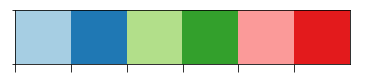

In [16]:
# on veut pouvoir visualiser la palette sélectionnée
sns.palplot(sns.color_palette('Paired'))

In [17]:
# on récupère le code hexa de chaque couleur
sns.color_palette('Paired').as_hex()

['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

**Références** :


* https://matplotlib.org/users/colormaps.html
* http://seaborn.pydata.org/tutorial/color_palettes.html


## Exemples

In [18]:
data = pd.read_csv("data.csv")

In [19]:
data.head()

id                  name sex  age   income  workin_hour  contract
0  ZS48SZ   Isabelle Le Maillet   F   31   603.31         16.2         3
1  ND40SY      Laurent de Dupuy   M   36     0.00         24.0         2
2  EA97WC  Lucas Blanchet-Pires   M   44  2243.70         49.5         1
3  BG45AF  Arthur Vasseur-Peron   M   38   298.61          6.6         3
4  LM30DM    Philippe Pelletier   M   36   501.57         12.8         3

On veut par exemple le nombre de femmes et d'hommes de notre datasets

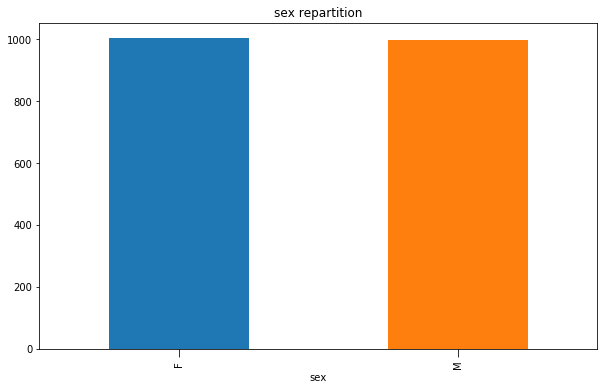

In [20]:
data.groupby('sex')['sex'].count().plot.bar(title='sex repartition')

Et si on traçait les points (age, salaire) ou (heure travaillée, salaire) en fonction du sexe, ou du type de contrat ?

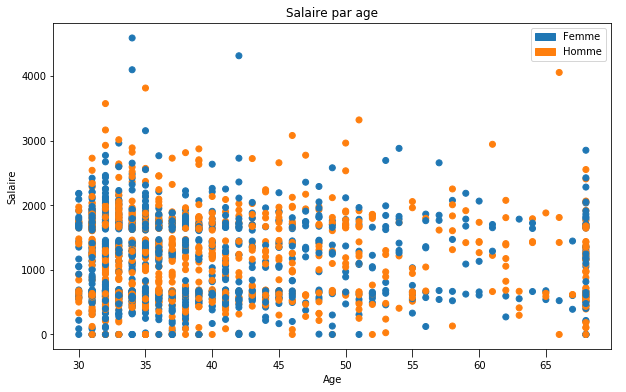

In [21]:
pairs = sns.color_palette('tab10', 2)
colors = [pairs[i] for i in data['sex'].apply(lambda x: 0 if x=='F' else 1)]
plt.scatter(data['age'], data['income'], c=colors)
sex_f_patch = mpatches.Patch(color=pairs[0], label='Femme')
sex_m_patch = mpatches.Patch(color=pairs[1], label='Homme')
plt.legend(handles=[sex_f_patch, sex_m_patch])
plt.title("Salaire par age")
plt.xlabel("Age")
_ = plt.ylabel("Salaire")

On peut aussi faire le salaire en fonction des heures hebdo

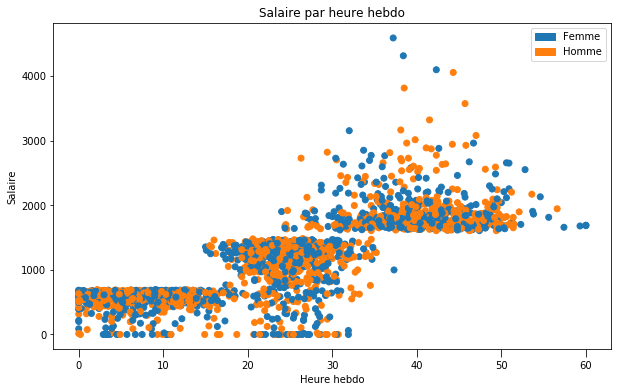

In [22]:
plt.scatter(data['workin_hour'], data['income'], c=colors)
sex_f_patch = mpatches.Patch(color=pairs[0], label='Femme')
sex_m_patch = mpatches.Patch(color=pairs[1], label='Homme')
plt.legend(handles=[sex_f_patch, sex_m_patch])
plt.title("Salaire par heure hebdo")
plt.xlabel("Heure hebdo")
_ = plt.ylabel("Salaire")

Le même graphe mais avec comme type de point (les couleurs) le type de contrat

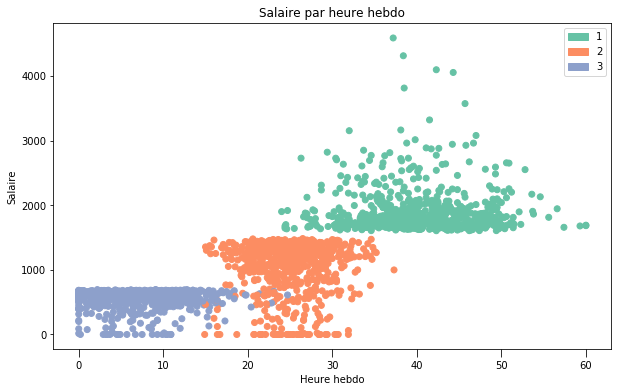

In [23]:
triple = sns.color_palette('Set2', 3)
colors = [triple[c-1] for c in data['contract']]
plt.scatter(data['workin_hour'], data['income'], c=colors)
contract_0_patch = mpatches.Patch(color=triple[0], label='1')
contract_1_patch = mpatches.Patch(color=triple[1], label='2')
contract_2_patch = mpatches.Patch(color=triple[2], label='3')
plt.legend(handles=[contract_0_patch, contract_1_patch, contract_2_patch])
plt.title("Salaire par heure hebdo")
plt.xlabel("Heure hebdo")
_ = plt.ylabel("Salaire")

Et plusieurs graphes d'un coup ??

* distribution d'une variable pour chaque catégorie (ici type de contrat)
* nuage de point entre 2 ou plus de variables

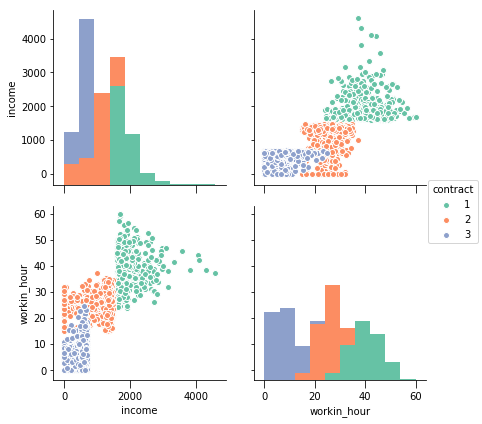

In [24]:
p = sns.pairplot(data[['income', 'workin_hour', 'contract']],
                 hue='contract',
                 palette='Set2',
                 x_vars=['income', 'workin_hour'],
                 y_vars=['income', 'workin_hour'], size=3)

### Exemple de matrice de corrélation

Avec le datasets **Boston** du sklearn

In [25]:
import sklearn.datasets as dds

In [26]:
boston = dds.load_boston()
print("\n".join(boston['DESCR'].splitlines()[13:28]))

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


In [27]:
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

Matrice de corrélation via une carte de chaleur, *heatmap*.

Heatmap de seaborn par défaut.

In [28]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.452220 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
target  -0.385832  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    target  
CRIM    -0.377904  0.622029  0.579564  0.288250 -0.377365  0.452220 -0.385832  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
target   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

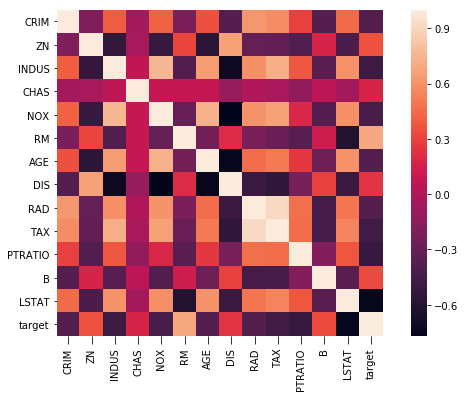

In [29]:
sns.heatmap(df.corr(), square=True)

Couleur sombre pour les valeurs faibles.

On peut changer la *colormap*.

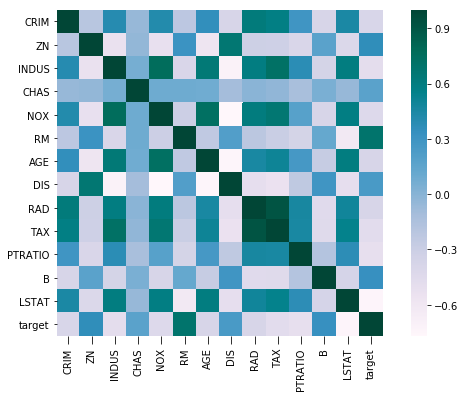

In [30]:
sns.heatmap(df.corr(), square=True, cmap='PuBuGn')

On va plutôt utiliser une palette *diverging*

* Valeurs continues bornées entre [-1, 1]
* Symétrie autour de 0.

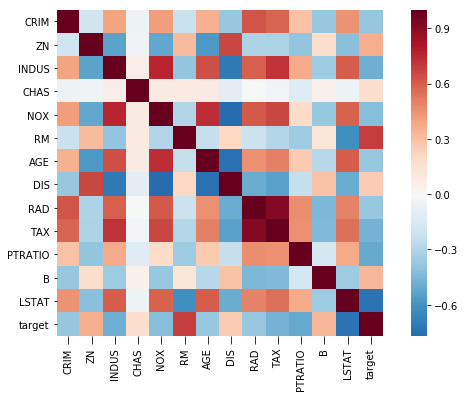

In [31]:
sns.heatmap(df.corr(), square=True, cmap='RdBu_r', center=0.)

On va améliorer la lisibilité.

Plus grand, avec des valeurs

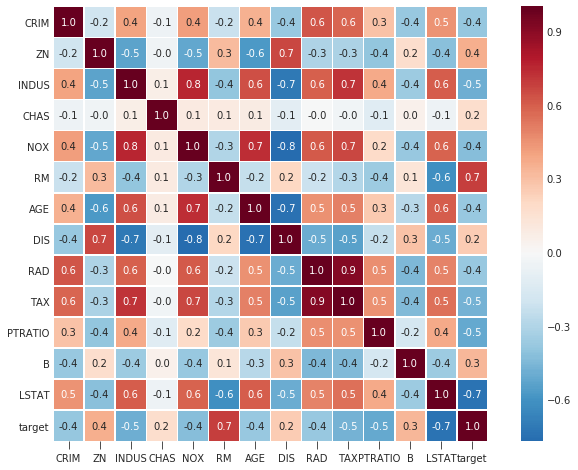

In [32]:
with sns.axes_style("white", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(df.corr(), square=True, cmap='RdBu_r', center=0., linewidths=.5, annot=True, fmt=".1f", ax=ax)

Puis on va ré-ordonner un peu tout ça.

On va ordonner les *features* en fonction de leur corrélation avec la valeur cible, *target* (prix des maisons).

In [33]:
rho = df.corr()
t = rho.target
cols = t.sort_values(ascending=False).index
cols

Index(['target', 'RM', 'ZN', 'B', 'DIS', 'CHAS', 'AGE', 'RAD', 'CRIM', 'NOX',
       'TAX', 'INDUS', 'PTRATIO', 'LSTAT'],
      dtype='object')

In [34]:
rho.loc[cols, cols]

target        RM        ZN         B       DIS      CHAS       AGE  \
target   1.000000  0.695360  0.360445  0.333461  0.249929  0.175260 -0.376955   
RM       0.695360  1.000000  0.311991  0.128069  0.205246  0.091251 -0.240265   
ZN       0.360445  0.311991  1.000000  0.175520  0.664408 -0.042697 -0.569537   
B        0.333461  0.128069  0.175520  1.000000  0.291512  0.048788 -0.273534   
DIS      0.249929  0.205246  0.664408  0.291512  1.000000 -0.099176 -0.747881   
CHAS     0.175260  0.091251 -0.042697  0.048788 -0.099176  1.000000  0.086518   
AGE     -0.376955 -0.240265 -0.569537 -0.273534 -0.747881  0.086518  1.000000   
RAD     -0.381626 -0.209847 -0.311948 -0.444413 -0.494588 -0.007368  0.456022   
CRIM    -0.385832 -0.219940 -0.199458 -0.377365 -0.377904 -0.055295  0.350784   
NOX     -0.427321 -0.302188 -0.516604 -0.380051 -0.769230  0.091203  0.731470   
TAX     -0.468536 -0.292048 -0.314563 -0.441808 -0.534432 -0.035587  0.506456   
INDUS   -0.483725 -0.391676 -0.533828 -0.356977 -0.708027  0.062938  0.644779   
PTRATIO -0.507787 -0.355501 -0.391679 -0.177383 -0.232471 -0.121515  0.261515   
LSTAT   -0.737663 -0.613808 -0.412995 -0.366087 -0.496996 -0.053929  0.602339   

              RAD      CRIM       NOX       TAX     INDUS   PTRATIO     LSTAT  
target  -0.381626 -0.385832 -0.427321 -0.468536 -0.483725 -0.507787 -0.737663  
RM      -0.209847 -0.219940 -0.302188 -0.292048 -0.391676 -0.355501 -0.613808  
ZN      -0.311948 -0.199458 -0.516604 -0.314563 -0.533828 -0.391679 -0.412995  
B       -0.444413 -0.377365 -0.380051 -0.441808 -0.356977 -0.177383 -0.366087  
DIS     -0.494588 -0.377904 -0.769230 -0.534432 -0.708027 -0.232471 -0.496996  
CHAS    -0.007368 -0.055295  0.091203 -0.035587  0.062938 -0.121515 -0.053929  
AGE      0.456022  0.350784  0.731470  0.506456  0.644779  0.261515  0.602339  
RAD      1.000000  0.622029  0.611441  0.910228  0.595129  0.464741  0.488676  
CRIM     0.622029  1.000000  0.417521  0.579564  0.404471  0.288250  0.452220  
NOX      0.611441  0.417521  1.000000  0.668023  0.763651  0.188933  0.590879  
TAX      0.910228  0.579564  0.668023  1.000000  0.720760  0.460853  0.543993  
INDUS    0.595129  0.404471  0.763651  0.720760  1.000000  0.383248  0.603800  
PTRATIO  0.464741  0.288250  0.188933  0.460853  0.383248  1.000000  0.374044  
LSTAT    0.488676  0.452220  0.590879  0.543993  0.603800  0.374044  1.000000

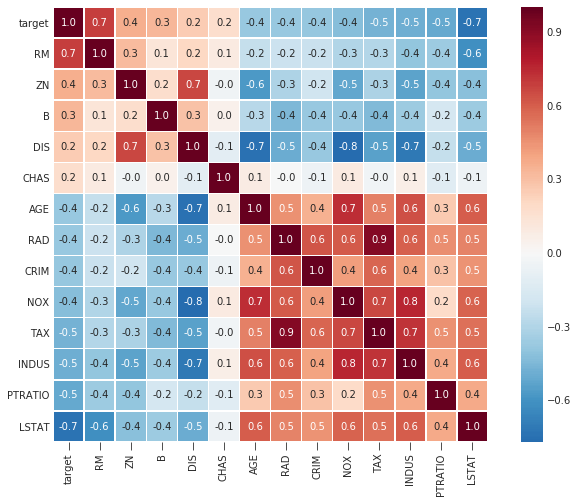

In [35]:
with sns.axes_style("white", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(rho.loc[cols, cols], square=True, cmap='RdBu_r',
                center=0., linewidths=.5, annot=True, fmt=".1f", ax=ax)

## Petite Pause

Des questions ?

## Une histoire de proportions

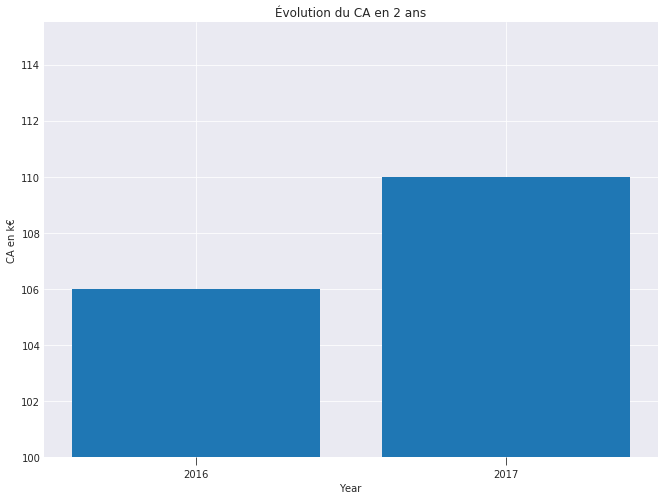

In [36]:
ca = [106, 110]
with sns.axes_style("darkgrid", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots(figsize=(11, 8))
    ax.bar([1, 2], ca)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['2016', '2017'])
    ax.set_xlabel('Year')
    ax.set_ylabel('CA en k€')
    ax.set_title('Évolution du CA en 2 ans')
    ax.set_ylim(100)

### Vos impressions ?

* bonne croissance
* +50% !!
* y'a quand même un problème

L'axe des **y** ne commence pas à **zéro**

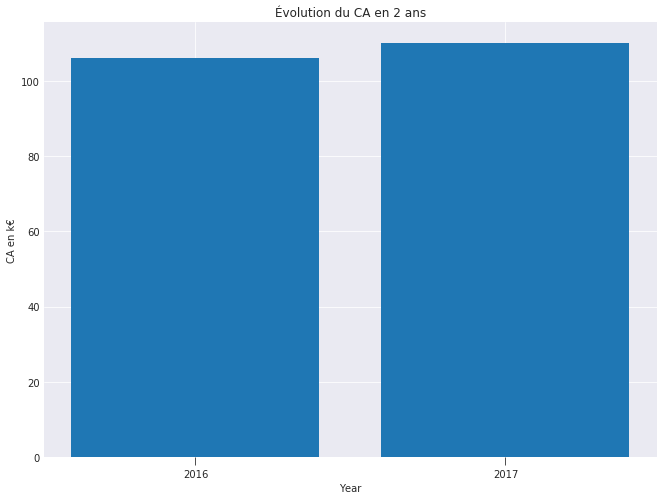

In [37]:
with sns.axes_style("darkgrid", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots(figsize=(11, 8))
    ax.bar([1, 2], ca)
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['2016', '2017'])
    ax.set_xlabel('Year')
    ax.set_ylabel('CA en k€')
    ax.set_title('Évolution du CA en 2 ans')

## Autre exemple

### Rapide exemple avec séries temporelles

Par expérience, mettre des dates en abscisses, avec matplotlib, c'est pénible...

Avec pandas et les séries temporelles, c'facile.

**Données historiques des actions**

In [56]:
stocks = pd.read_csv('stock-open.csv', parse_dates=['date'])
stocks = stocks.set_index('date')

In [57]:
stocks.head()

AMZN        AAPL        GOOG
date                                          
2017-02-27  842.380005  137.139999  824.549988
2017-02-28  851.450012  137.080002  825.609985
2017-03-01  853.049988  137.889999  828.849976
2017-03-02  853.080017  140.000000  833.849976
2017-03-03  847.200012  138.779999  830.559998

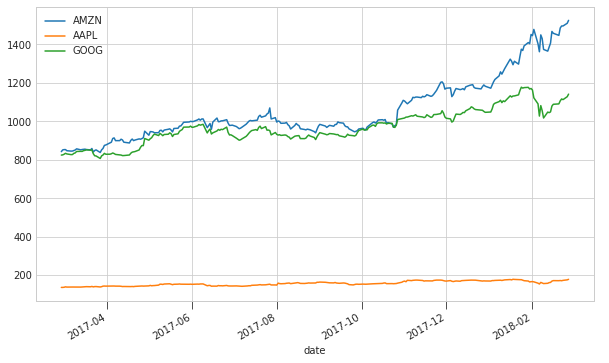

In [58]:
with sns.axes_style("whitegrid", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots()
    stocks.plot(ax=ax)

L'affichage des abscisses s'adapte à la fréquence.

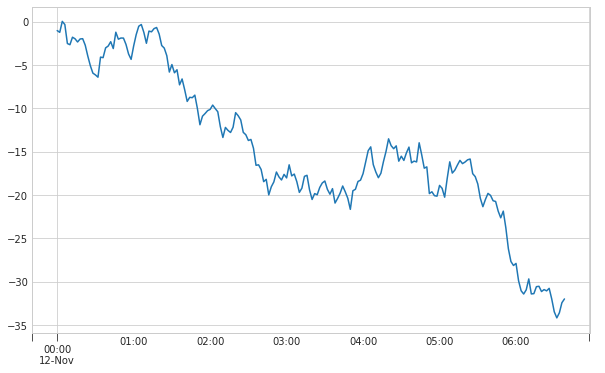

In [60]:
ts = pd.date_range('2017-11-12', periods=200, freq='2T')
s = pd.Series(np.random.randn(200).cumsum(), index=ts)
with sns.axes_style("whitegrid", {'xtick.major.size': 8.0}):
    fig, ax = plt.subplots()
    s.plot(ax=ax)

## Autres Bibliothèques

* Altair https://altair-viz.github.io/
* Bokeh https://bokeh.pydata.org/en/latest/
* Holoviews http://holoviews.org/
* Dash by plotly https://plot.ly/dash/getting-started

### Altair

*Declarative statistical visualization*

* Grammaire pour de la visualisation (vega-lite)
* Visu en ligne
* Exemple : https://vega.github.io/vega-lite/examples/histogram.html

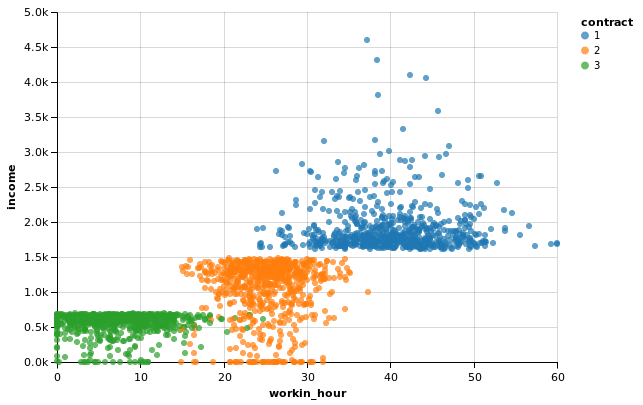

In [62]:
alt.Chart(data[['workin_hour', 'income', 'contract']]).mark_circle().encode(
    x='workin_hour',
    y='income',
    color='contract:N')

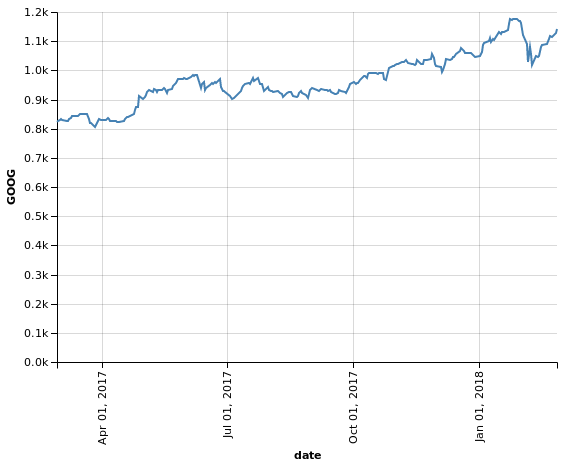

In [65]:
alt.Chart(stocks.reset_index()).mark_line().encode(
    x='date',
    y='GOOG')

Un peu plus pénible pour faire plusieurs lignes.

### HoloViews

* Orientée analyse de données et exploration
* Simple (peu de lignes de code), déclaratif
* Plusieurs *backend* : bokeh, matplotlob, plotly
* Avec [datashader](https://github.com/bokeh/datashader) : exploration de gros volumes de données 
* Gallery http://holoviews.org/gallery/index.html


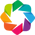

In [66]:
import holoviews as hv
hv.extension('bokeh', 'matplotlib')

In [67]:
ds = hv.Dataset(data)
points = ds.to(hv.Points, ['workin_hour', 'income'], groupby='contract').overlay()

In [68]:
points(plot=dict(legend_position='right', toolbar='above', width=600, height=400))

:NdOverlay   [contract]
   :Points   [workin_hour,income]

In [69]:
dstocks = hv.Dataset(stocks.reset_index(), ['date'], stocks.columns.tolist())

In [70]:
table = hv.Table(dstocks)

In [71]:
table

:Table   [date]   (AMZN,AAPL,GOOG)

In [72]:
dstocks.to(hv.Curve, 'date')

:Curve   [date]   (AMZN,AAPL,GOOG)

In [73]:
(dstocks.to(hv.Curve, 'date', 'AAPL') + dstocks.to(hv.Curve, 'date', 'GOOG'))

:Layout
   .Curve.I  :Curve   [date]   (AAPL)
   .Curve.II :Curve   [date]   (GOOG)

In [74]:
stock_dict = {x: table.to(hv.Curve, 'date', x) for x in stocks.columns.tolist()}

In [75]:
%%opts Curve [width=600 height=400] {+framewise}
hv.NdOverlay(stock_dict, kdims="stocks")

:NdOverlay   [stocks]
   :Curve   [date]   (GOOG)

## Dash (by plotly)

* orientée **dashboard**
* intéractif
* installation https://plot.ly/dash/installation
* tutoriel https://plot.ly/dash/getting-started
* article d'introduction https://medium.com/@plotlygraphs/introducing-dash-5ecf7191b503 

In [77]:
# For Jupyter notebook only
import plotly
from plotly.offline import download_plotlyjs, iplot
import plotly.graph_objs as go

plotly.offline.init_notebook_mode()

In [78]:
X = 'workin_hour'
Y = 'income'
GROUP = 'contract'

graph_dict = {
    'data': [
        go.Scatter(
            x=data[data[GROUP] == i][X],
            y=data[data[GROUP] == i][Y],
            text=data[data[GROUP] == i][GROUP],
            mode='markers',
            opacity=0.7,
            marker={
               'size': 6,
               'line': {'width': 0.5, 'color': 'white'}
            },
            name=i
        ) for i in data[GROUP].unique()
    ],
    'layout': go.Layout(
        xaxis={'title': 'Heure hebdo'},
        yaxis={'title': 'Salaire'},
        margin={'l': 40, 'b': 40, 't': 10, 'r': 10},
        legend={'x': 0, 'y': 1},
        hovermode='closest'
    )
}

In [10]:
iplot(graph_dict)

Essayons avec les séries temporelles

In [79]:
stock_series = [
    go.Scatter(
        x=stocks.index,
        y=stocks[label],
        name=label,
        opacity=0.8
    )
    for label in stocks
]

In [80]:
layout = dict(
    title = "Open Stocks",
    xaxis={"title": "Date"},
    yaxis={"title": "Stock Value"}
)

In [81]:
iplot(go.Figure(layout=layout, data=stock_series))

## Conclusions

* la visualisation pour explorer et comprendre
* importance du choix des couleurs
* des proportions
* plusieurs bibiliothèques à votre portée

**Notebook et données** sur Github

https://github.com/garaud/python-meetup-data-visualization

## Ressources

### Articles

* [Choosing colormaps / matplotlib](https://matplotlib.org/users/colormaps.html)
* [Choosing color palettes / seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Why Should Engineers and Scientists Be Worried About Color? / IBM Research](http://www.research.ibm.com/people/l/lloydt/color/color.HTM)

### Books

* [Edward Tufte: The Visual Display of Quantitative Information](https://www.edwardtufte.com/tufte/books_vdqi)
* [Dona M. Wong : Guide to Information Graphics](http://donawong.com/)